# Métricas e Avaliação de Regressão

In [1]:
import pandas as pd
from sklearn import (
    model_selection,
    preprocessing
)
from sklearn.model_selection import train_test_split
from pathlib import Path

In [2]:
ROOT_DIR = Path.cwd().parent
DATA = ROOT_DIR / 'datasets' / 'housing.csv'

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(DATA, header=None, delimiter=r"\s+", names=column_names)

In [4]:
# a target do dataset de boston é o MEDV
bos_y = df.MEDV
bos_X = df.drop('MEDV', axis=1)
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [6]:
bos_sX = preprocessing.StandardScaler().fit_transform(bos_X)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

In [10]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [11]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [13]:
rfr.fit(bos_X_train, bos_y_train)
rfr.score(bos_X_test, bos_y_test)

0.8708997131330258

In [14]:
bos_y_test_pred = rfr.predict(bos_X_test)

In [15]:
"""
    O valor encontrado nessa métrica é o erro médio absoluto,
    que é a média do valor absoluto dos erros entre a predição e o valor real.

    O que isso diz? Que em média, o modelo erra em x unidades.
"""
metrics.mean_absolute_error(bos_y_test, bos_y_test_pred)

2.083605263157894

In [16]:
"""
    O valor encontrado nessa métrica é o erro médio quadrático,
    que é a média do quadrado dos erros entre a predição e o valor real.

    O que isso diz? Que em média,
    o modelo erra em x unidades, mas que os erros são penalizados
    de forma que erros maiores são mais penalizados.

    Ou seja o erro médio quadrático é uma métrica que penaliza mais os erros maiores.

    O valor encontrado simboliza que em média, o modelo erra em x unidades.
"""
metrics.mean_squared_error(bos_y_test, bos_y_test_pred)

9.619662013157892

In [17]:
"""
    O valor encontrado nessa métrica é o erro médio quadrático logarítmico,
    que é a média do quadrado dos erros entre a predição e o valor real,
    mas que os erros são penalizados de forma que erros maiores são mais penalizados.

    Ou seja o erro médio quadrático logarítmico é uma métrica que 
    penaliza mais os erros maiores.

    O valor encontrado simboliza que em média, o modelo erra em x unidades.

"""

metrics.mean_squared_log_error(bos_y_test, bos_y_test_pred)

0.02128735507001922

## Gráfico de Resíduos

In [19]:
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt

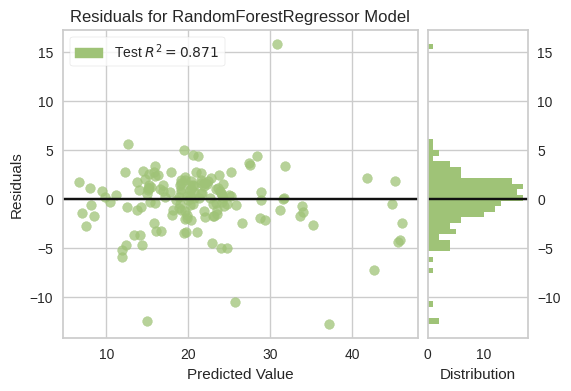

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))

rpv = ResidualsPlot(rfr)
rpv.score(bos_X_test, bos_y_test)
rpv.poof()

## Heterocedasticidade

In [38]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import numpy as np

In [40]:
"""

Os valores impressos após realizar o teste de Breusch-Pagan são estatísticas que ajudam 
a avaliar se há heterocedasticidade nos resíduos do seu modelo. Vamos entender cada um deles:

Lagrange multiplier statistic (Estatística do multiplicador de Lagrange):
    Este valor é uma medida da força da relação entre os resíduos e as variáveis independentes.
    Quanto maior o valor, mais forte é a evidência de heterocedasticidade.

p-value:
    Este valor indica a probabilidade de observar a estatística do teste assumindo que
    não há heterocedasticidade. Um valor baixo (geralmente < 0,05) sugere que você pode
    rejeitar a hipótese nula de homocedasticidade, indicando a presença de heterocedasticidade.

f-value:
    Este é o valor crítico usado para testar a hipótese nula de que não há heterocedasticidade.
    Quanto maior o valor, mais favorável é à presença de heterocedasticidade

f p-value:
    Este valor p é específico para o teste F associado à estatística do multiplicador de Lagrange.
    Assim como o valor p acima, um valor baixo sugere evidência contra a hipótese nula
"""

res = bos_y_test - bos_y_test_pred
bos_y_test_com_constante = sm.add_constant(bos_X_test)

hb = sms.het_breuschpagan(res, bos_y_test_com_constante)

labels = [
    "Lagrange multiplier statistic",
    "p-value",
    "f-value",
    "f p-value"
]

for name, num in zip(labels, hb):
    print(f"{name}: {num}")


Lagrange multiplier statistic: 22.340099889003827
p-value: 0.05031106006687347
f-value: 1.8290061342394537
f p-value: 0.044236442692523116


<Axes: title={'center': 'Histogram of residuals'}, ylabel='Frequency'>

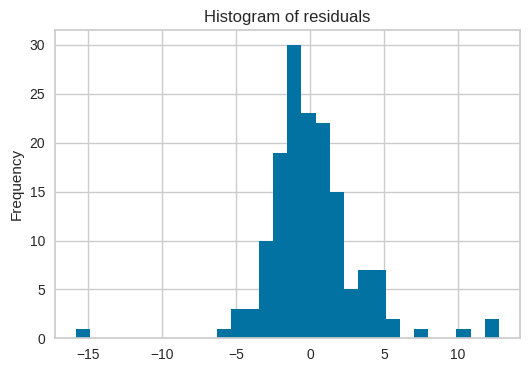

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))

pd.Series(res, name="residuals" ).plot.hist(bins=30, ax=ax, title="Histogram of residuals")

((array([-2.60828957, -2.28890067, -2.10591774, -1.97438596, -1.87014095,
         -1.78297348, -1.7075655 , -1.64077866, -1.58059905, -1.52565375,
         -1.474963  , -1.42780197, -1.3836187 , -1.34198267, -1.30255131,
         -1.26504733, -1.22924293, -1.1949486 , -1.16200487, -1.1302762 ,
         -1.09964636, -1.07001489, -1.0412943 , -1.01340792, -0.98628816,
         -0.95987505, -0.93411519, -0.90896073, -0.88436868, -0.86030017,
         -0.83672   , -0.81359614, -0.79089936, -0.76860288, -0.74668211,
         -0.72511441, -0.70387886, -0.68295608, -0.6623281 , -0.64197819,
         -0.62189074, -0.60205115, -0.58244576, -0.56306175, -0.54388703,
         -0.52491024, -0.50612064, -0.48750805, -0.46906285, -0.45077588,
         -0.43263844, -0.41464222, -0.39677931, -0.37904213, -0.3614234 ,
         -0.34391617, -0.32651373, -0.30920962, -0.29199761, -0.27487168,
         -0.257826  , -0.2408549 , -0.22395291, -0.20711465, -0.19033491,
         -0.1736086 , -0.15693072, -0.

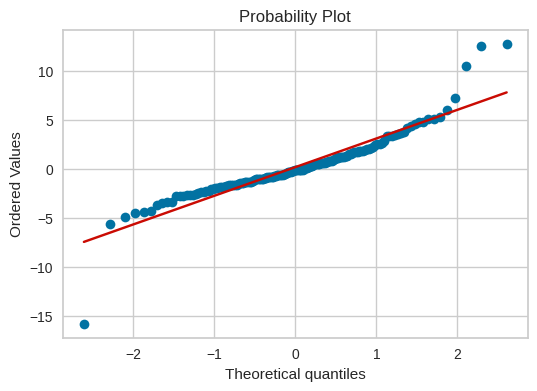

In [43]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(res, dist="norm", plot=ax)

In [44]:
stats.kstest(res, 'norm')

KstestResult(statistic=0.2030324289045929, pvalue=5.705755737845543e-06, statistic_location=-1.3629999999999907, statistic_sign=1)

In [45]:
from yellowbrick.regressor import PredictionError

/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


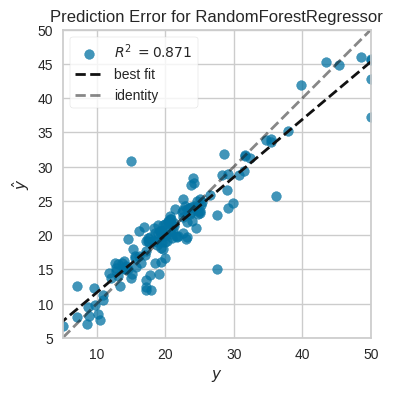

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
fig, ax = plt.subplots(figsize=(6, 4))
pev = PredictionError(rfr)
pev.fit(bos_X_train, bos_y_train)
pev.score(bos_X_test, bos_y_test)
pev.poof()